In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC  
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


Using TensorFlow backend.


In [3]:
dataset = pd.read_csv(r"sample_clean.csv")

In [4]:
df=dataset.copy()

In [5]:
loan = len(df[df['action_taken'] == 0])
no_loan =  df[df.action_taken == 1].index
random_indices = np.random.choice(no_loan,loan, replace=False)
loan_in = df[df.action_taken == 0].index
under_sample_indices = np.concatenate([loan_in,random_indices])
under_sample = df.loc[under_sample_indices]
under_sample.shape



(22674, 48)

In [6]:
X = under_sample.drop('action_taken',axis=1)
Y = under_sample['action_taken']
X_train, X_test, y_train, Y_test = train_test_split(X, Y, test_size=0.25) 

In [7]:
under_sample['action_taken'].value_counts()

1    11337
0    11337
Name: action_taken, dtype: int64

### Standadization

In [8]:
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Random Forest  

In [84]:
rand_class_smote = RandomForestClassifier(n_estimators = 50,random_state=2)
rand_class_smote.fit(x_train, y_train)
y_pred_smote = rand_class_smote.predict(X_test)
y_pred_train_smote = rand_class_smote.predict(x_train)

In [96]:
print('Accuracy',accuracy_score(Y_test,y_pred_smote))
print('Precision of 0:',precision_score(Y_test,y_pred_smote,pos_label=0))
print('Precision of 1:',precision_score(Y_test,y_pred_smote,pos_label=1))
print('\n')
print('Recall of 0:',recall_score(Y_test,y_pred_smote,pos_label=0))
print('Recall of 1:',recall_score(Y_test,y_pred_smote,pos_label=1))


Accuracy 0.984653378020815
Precision of 0: 0.9701803051317615
Precision of 1: 0.999640933572711


Recall of 0: 0.9996427295462665
Recall of 1: 0.9700348432055749


In [87]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_smote))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2799
           1       1.00      0.97      0.98      2870

    accuracy                           0.98      5669
   macro avg       0.98      0.98      0.98      5669
weighted avg       0.99      0.98      0.98      5669



[[2798    1]
 [  86 2784]]


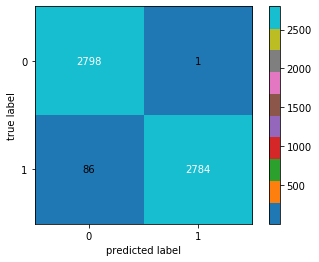

In [88]:
conf_matrix = confusion_matrix(Y_test, y_pred_smote)
plot_confusion_matrix(conf_matrix,cmap='tab10',colorbar=True)
print(conf_matrix)

### Logistic Regression

In [12]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_pred_train_log = log_reg.predict(x_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [94]:
print('Accuracy',accuracy_score(y_pred_log,Y_test))
print('Precision of 0:',precision_score(Y_test,y_pred_log,pos_label=0))
print('Precision of 1:',precision_score(Y_test,y_pred_log,pos_label=1))
print('\n')
print('Recall of 0:',recall_score(Y_test,y_pred_log,pos_label=0))
print('Recall of 1:',recall_score(Y_test,y_pred_log,pos_label=1))

Accuracy 0.9820074087140589
Precision of 0: 0.9664475959875476
Precision of 1: 0.9982001439884809


Recall of 0: 0.9982136477313326
Recall of 1: 0.9662020905923345


In [92]:
print(classification_report(Y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2799
           1       1.00      0.97      0.98      2870

    accuracy                           0.98      5669
   macro avg       0.98      0.98      0.98      5669
weighted avg       0.98      0.98      0.98      5669



[[2794    5]
 [  97 2773]]


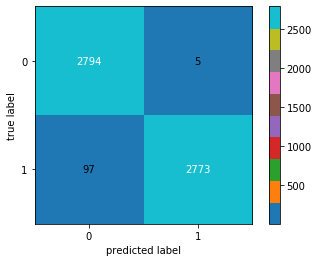

In [77]:
conf_matrix = confusion_matrix(Y_test, y_pred_log)
plot_confusion_matrix(conf_matrix,cmap='tab10',colorbar=True)
print(conf_matrix)

### Naive Bayes

In [15]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)
y_pred_naive = naive_bayes.predict(X_test)
y_pred_train_naive = naive_bayes.predict(x_train)

In [75]:
print('Accuracy',accuracy_score(y_pred_naive,Y_test))
print('Precision of 0:',precision_score(Y_test,y_pred_naive,pos_label=0))
print('Precision of 1:',precision_score(Y_test,y_pred_naive,pos_label=1))
print('\n')
print('Recall of 0:',recall_score(Y_test,y_pred_naive,pos_label=0))
print('Recall of 1:',recall_score(Y_test,y_pred_naive,pos_label=1))


Accuracy 0.9744222967013583
Precision of 0: 0.9719061166429588
Precision of 1: 0.9768988449422471


Recall of 0: 0.9764201500535906
Recall of 1: 0.9724738675958188


In [17]:
print(classification_report(Y_test,y_pred_naive))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2799
           1       0.98      0.97      0.97      2870

    accuracy                           0.97      5669
   macro avg       0.97      0.97      0.97      5669
weighted avg       0.97      0.97      0.97      5669



[[2733   66]
 [  79 2791]]


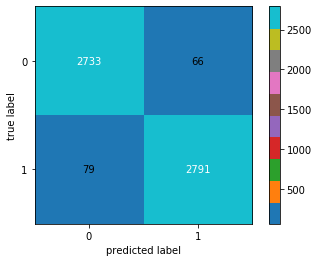

In [79]:
conf_matrix = confusion_matrix(Y_test, y_pred_naive)
plot_confusion_matrix(conf_matrix,cmap='tab10',colorbar=True)
print(conf_matrix)

### LDA

In [18]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
y_pred_lda = lda.predict(X_test)
y_pred_train_lda = lda.predict(x_train)

//anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [74]:
print('Accuracy',accuracy_score(y_pred_lda,Y_test))
print('Precision of 0:',precision_score(Y_test,y_pred_lda,pos_label=0))
print('Precision of 1:',precision_score(Y_test,y_pred_lda,pos_label=1))
print('\n')
print('Recall of 0:',recall_score(Y_test,y_pred_lda,pos_label=0))
print('Recall of 1:',recall_score(Y_test,y_pred_lda,pos_label=1))


Accuracy 0.9798906332686541
Precision of 0: 0.9618163054695562
Precision of 1: 0.998913830557567


Recall of 0: 0.9989281886387996
Recall of 1: 0.9613240418118467


In [20]:
print(classification_report(Y_test,y_pred_lda))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2799
           1       1.00      0.96      0.98      2870

    accuracy                           0.98      5669
   macro avg       0.98      0.98      0.98      5669
weighted avg       0.98      0.98      0.98      5669



[[2796    3]
 [ 111 2759]]


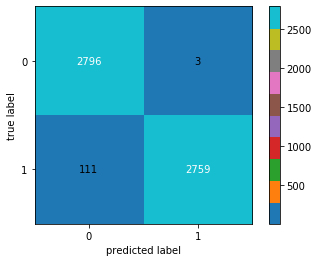

In [80]:
conf_matrix = confusion_matrix(Y_test, y_pred_lda)
plot_confusion_matrix(conf_matrix,cmap='tab10',colorbar=True)
print(conf_matrix)

### XG Boost

In [21]:
from xgboost import XGBClassifier

xg_boost = XGBClassifier()
xg_boost.fit(x_train,y_train)
y_pred_xg = xg_boost.predict(X_test)
y_pred_xg_train = xg_boost.predict(x_train)

In [93]:
print('Accuracy',accuracy_score(y_pred_xg,Y_test))

print('Precision of 0:',precision_score(Y_test,y_pred_xg,pos_label=0))
print('Precision of 1:',precision_score(Y_test,y_pred_xg,pos_label=1))
print('\n')
print('Recall of 0:',recall_score(Y_test,y_pred_xg,pos_label=0))
print('Recall of 1:',recall_score(Y_test,y_pred_xg,pos_label=1))



Accuracy 0.9848297759745986
Precision of 0: 0.9701906412478336
Precision of 1: 1.0


Recall of 0: 1.0
Recall of 1: 0.9700348432055749


In [23]:
print(classification_report(Y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2799
           1       1.00      0.97      0.98      2870

    accuracy                           0.98      5669
   macro avg       0.99      0.99      0.98      5669
weighted avg       0.99      0.98      0.98      5669



[[2799    0]
 [  86 2784]]


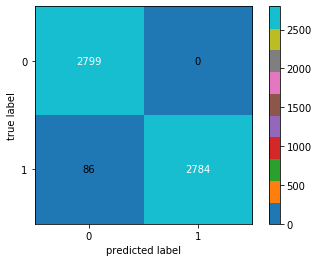

In [81]:
conf_matrix = confusion_matrix(Y_test, y_pred_xg)
plot_confusion_matrix(conf_matrix,cmap='tab10',colorbar=True)
print(conf_matrix)

### Adaboost

In [24]:
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=12)
ada_boost.fit(x_train, y_train)
y_pred_ada = ada_boost.predict(X_test)
y_pred_ada_train = ada_boost.predict(x_train)

In [97]:
print('Test')
print('Accuracy test',accuracy_score(y_pred_ada,Y_test))
print('Precision of 0:',precision_score(Y_test,y_pred_ada,pos_label=0))
print('Precision of 1:',precision_score(Y_test,y_pred_ada,pos_label=1))
print('\n')
print('Recall of 0:',recall_score(Y_test,y_pred_ada,pos_label=0))
print('Recall of 1:',recall_score(Y_test,y_pred_ada,pos_label=1))

Test
Accuracy test 0.9804198271300053
Precision of 0: 0.9666666666666667
Precision of 1: 0.9946217282179993


Recall of 0: 0.9946409431939979
Recall of 1: 0.9665505226480836


In [98]:
print(classification_report(Y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2799
           1       0.99      0.97      0.98      2870

    accuracy                           0.98      5669
   macro avg       0.98      0.98      0.98      5669
weighted avg       0.98      0.98      0.98      5669



[[2784   15]
 [  96 2774]]


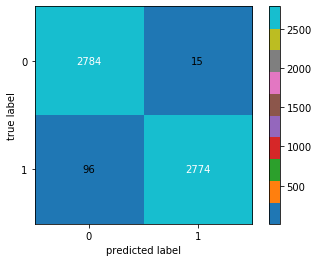

In [99]:
conf_matrix = confusion_matrix(Y_test, y_pred_ada)
plot_confusion_matrix(conf_matrix,cmap='tab10',colorbar=True)
print(conf_matrix)

AUC for  Random Forest  =  0.9848387863759207
AUC for  Logistic Regression  =  0.9822078691618336
AUC for  Naive Bayes  =  0.9744470088247047
AUC for  LDA  =  0.9801261152253231
AUC for  XGBoost  =  0.9850174216027874
AUC for  AdaBoost  =  0.9805957329210409


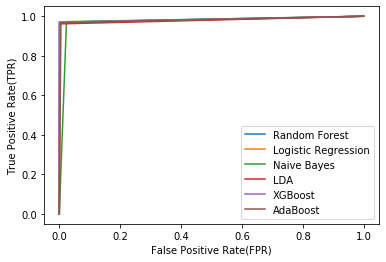

In [100]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

classifier_predictions = [y_pred_smote,y_pred_log,y_pred_naive,y_pred_lda,y_pred_xg,y_pred_ada]
classifier_names = ["Random Forest","Logistic Regression",'Naive Bayes','LDA','XGBoost','AdaBoost']
for i in range(len(classifier_predictions)):
    fpr,tpr,thresholds = roc_curve(Y_test,classifier_predictions[i])
    plt.plot(fpr,tpr,label= classifier_names[i])
    plt.xlabel("False Positive Rate(FPR)")
    plt.ylabel("True Positive Rate(TPR)")
    plt.legend()
    print("AUC for ",classifier_names[i]," = ",auc(fpr,tpr))


Precision Recall score for  Random Forest  =  0.9824390544435836
Precision Recall score for  Logistic Regression  =  0.9782384078629561
Precision Recall score for  Naive Bayes  =  0.9712738298785305
Precision Recall score for  LDA  =  0.9736868646029523
Precision Recall score for  XGBoost  =  0.9824390544435836
Precision Recall score for  AdaBoost  =  0.9691492545909338


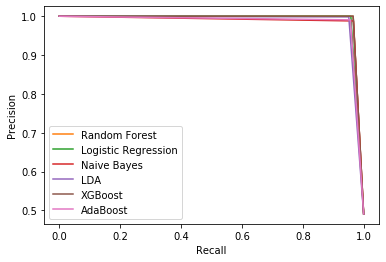

In [44]:
classifier_predictions = [y_pred_smote,y_pred_log,y_pred_naive,y_pred_lda,y_pred_xg,y_pred_ada]
classifier_names = ["Random Forest","Logistic Regression",'Naive Bayes','LDA','XGBoost','AdaBoost']

for i in range(len(classifier_predictions)):
    precision, recall, thresholds = precision_recall_curve(Y_test,classifier_predictions[i])
    plt.plot(recall,precision,label= classifier_names[i])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    print("Precision Recall score for ",classifier_names[i]," = ",(average_precision_score(Y_test,classifier_predictions[i])))


    


### Selected top features that we got fro Lasso and Random Forest and run our model

In [69]:
features = ['aus_1','applicant_credit_score_type','loan_term','purchaser_type','property_value','loan_purpose','income','applicant_age','loan_amount','manufactured_home_land_property_interest']
X_new = df[features]
Y_new = df['action_taken']
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new, Y_new, test_size=0.25) 

In [70]:
smt = SMOTE()
x_train_new, y_train_new = smt.fit_sample(X_train_new, Y_train_new)
np.bincount(Y_train_new)
np.bincount(y_train_new)

sc = StandardScaler()
x_train_new = sc.fit_transform(x_train_new)
X_test_new = sc.transform(X_test_new)

In [71]:
log_reg_top = LogisticRegression()
log_reg_top.fit(x_train_new, y_train_new)
y_pred_log_top = log_reg_top.predict(X_test_new)
y_pred_train_log_top = log_reg_top.predict(x_train_new)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [72]:
print('Accuracy Test',accuracy_score(y_pred_log_top,Y_test_new))
print('Accuracy Train',accuracy_score(y_pred_train_log_top,y_train_new))

Accuracy Test 0.9673655700134477
Accuracy Train 0.9834459421881182


In [73]:
print(classification_report(y_pred_log_top,Y_test_new))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29     16609
           1       0.97      1.00      0.98    405767

    accuracy                           0.97    422376
   macro avg       0.98      0.59      0.64    422376
weighted avg       0.97      0.97      0.96    422376



In [77]:
rand_class_top = RandomForestClassifier(n_estimators = 8,random_state=2)
rand_class_top.fit(x_train_new, y_train_new)
y_pred_rand_top = rand_class_top.predict(X_test_new)
y_pred_rand_train_top = rand_class_top.predict(x_train_new)

In [78]:
print('Accuracy Test',accuracy_score(y_pred_rand_top,Y_test_new))
print('Accuracy Train',accuracy_score(y_pred_rand_train_top,y_train_new))

Accuracy Test 0.9873382957365002
Accuracy Train 0.9969717169566371


In [79]:
print(classification_report(y_pred_rand_top,Y_test_new))

              precision    recall  f1-score   support

           0       0.36      0.22      0.28      4553
           1       0.99      1.00      0.99    417823

    accuracy                           0.99    422376
   macro avg       0.68      0.61      0.64    422376
weighted avg       0.98      0.99      0.99    422376



In [81]:
ada_boost_top = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=12)
ada_boost_top.fit(x_train_new, y_train_new)
y_pred_ada_top = ada_boost_top.predict(X_test_new)
y_pred_ada_train_top = ada_boost_top.predict(x_train_new)
print('Accuracy Test',accuracy_score(y_pred_ada_top,Y_test_new))
print('Accuracy Train',accuracy_score(y_pred_ada_train_top,y_train_new))
print(classification_report(y_pred_ada_top,Y_test_new))

Accuracy Test 0.977141220145084
Accuracy Train 0.9887457354560579
              precision    recall  f1-score   support

           0       0.74      0.19      0.30     11000
           1       0.98      1.00      0.99    411376

    accuracy                           0.98    422376
   macro avg       0.86      0.59      0.65    422376
weighted avg       0.97      0.98      0.97    422376



Precision Recall score for  Random Forest  =  0.9956264833943154
Precision Recall score for  Logistic Regression  =  0.9997575425387186
Precision Recall score for  AdaBoost  =  0.998075044641125


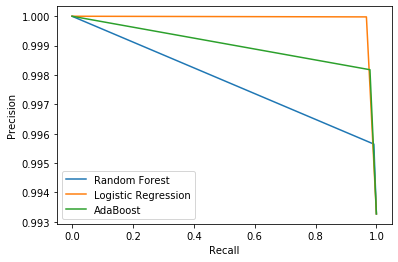

In [85]:
from sklearn.metrics import precision_recall_curve

classifier_predictions = [y_pred_rand_top,y_pred_log_top,y_pred_ada_top]
classifier_names = ["Random Forest","Logistic Regression",'AdaBoost']

for i in range(len(classifier_predictions)):
    precision, recall, thresholds = precision_recall_curve(Y_test_new,classifier_predictions[i])
    plt.plot(recall,precision,label= classifier_names[i])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    print("Precision Recall score for ",classifier_names[i]," = ",(average_precision_score(Y_test_new,classifier_predictions[i])))

